In [3]:
#Sentiment Analysis - 03 | Text Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
data.shape

(7920, 3)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Text Preprocessing

In [9]:
import re
import string

01.convert uppercase to lowercase

In [10]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [12]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

02.Remove Links

In [13]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [14]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

03.Remove Punctuations

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data['tweet'] = data['tweet'].apply(remove_punctuation)

In [17]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

04.Remove Numbers

In [18]:
data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [19]:
data['tweet'].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  … bay amazon etsy...
8    bout to go shopping again listening to music i...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

05.Remove Stopwords

In [20]:
#!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [24]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [26]:
data['tweet']

0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

06. Stemming

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data['tweet'] =  data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [29]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [30]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Vocabulary Building

In [31]:
from collections import Counter
vocab = Counter()

In [32]:
#vocab.update(['java','python','python','c++'])

In [33]:
#vocab

In [34]:
vocab

Counter()

In [35]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [36]:
for sentence in data['tweet']:
    vocab.update(sentence.split())
    

In [37]:
vocab
#len(vocab)

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [38]:
data.shape

(7920, 3)

In [39]:
tokens = [key for key in vocab if vocab[key]>10]

In [40]:
len(tokens)

1145

In [41]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [42]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')

# Divide dataset

In [43]:
x = data['tweet']
y = data['label']

In [44]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [45]:
#!pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [47]:
x_train.shape

(6336,)

In [48]:
x_test.shape

(1584,)

In [49]:
y_train

1695    0
4633    1
7105    0
860     0
6861    1
       ..
5616    1
2374    0
7588    0
875     0
3287    1
Name: label, Length: 6336, dtype: int64

# Vectorization

In [64]:
x_train

1695                    love phone flash score time iphon
4633                    phone updat nearli five hour work
7105    would like wish amaz day make everi minut coun...
860     want download free iphon app today spread styl...
6861    phone shut andor restart time per day minimum ...
                              ...                        
5616    hateappl rt npolowydraw father day dad love gi...
2374    xlhslbccktk love picoftheday meday selca selfi...
7588    would like wish amaz day make everi minut coun...
875     colorsplash iphon found heart virtual slide ha...
3287    wish itun wasnt complet po allow drag drop mus...
Name: tweet, Length: 6336, dtype: object

In [86]:
x_test

7384    lloydyb mate dont get start old aupair bought ...
3042           magnific one mine samsung brilliant incred
7495    gain follow rt must follow follow back follow ...
3221    im glad updatedmi iphon iosmi app dont even wo...
4290    cant find nowher tagsforlik tfler tweegram pho...
                              ...                        
1752     twitter io suck alway crash fail appl ipad iphon
2295    aaronskip tweet oomf southsid ipho suburb ipho...
2700    support give us follow retweet us followu mobi...
521     periwinkl blue wooden bird feeder garden gift ...
4403    gain follow rt must follow follow back follow ...
Name: tweet, Length: 1584, dtype: object

In [94]:
print(pd.read_csv('../static/model/vocabulary.txt').head())

      test
0  android
1      app
2   beauti
3     cute
4   health


In [97]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentences_lst = np.zeros(len(vocabulary))
    
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentences_lst[i] = 1
                
        vectorized_lst.append(sentences_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)
    
    return vectorized_lst_new


In [58]:
vectorized_x_train = vectorizer(x_train, tokens)

In [59]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
vectorized_x_test = vectorizer(x_test, tokens)

In [61]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
y_train.value_counts() # Inbalanec 

label
0    4734
1    1602
Name: count, dtype: int64

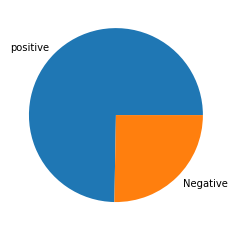

In [76]:

plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['positive','Negative'])
plt.show()

# Handle imbalanced dataset

In [70]:
#!pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9468, 1145) (9468,)


In [73]:
y_train_smote.value_counts()

label
0    4734
1    4734
Name: count, dtype: int64

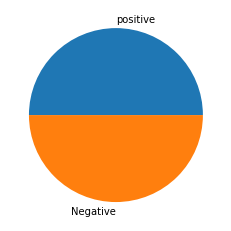

In [78]:

plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['positive','Negative'])
plt.show()

In [79]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
y_train_smote

0       0
1       1
2       0
3       0
4       1
       ..
9463    1
9464    1
9465    1
9466    1
9467    1
Name: label, Length: 9468, dtype: int64

In [83]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
y_test

7384    1
3042    0
7495    0
3221    1
4290    0
       ..
1752    1
2295    0
2700    0
521     0
4403    0
Name: label, Length: 1584, dtype: int64

# Model Building and Evaluation

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [131]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Traning Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall={rec}\n\tF1-Score={f1}')

In [132]:
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall={rec}\n\tF1-Score={f1}')

# Logistic Regression

In [133]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

LogisticRegression()

In [134]:
y_train_pred  = lr.predict(vectorized_x_train_smote)

In [135]:
y_train_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [136]:
y_train_smote

0       0
1       1
2       0
3       0
4       1
       ..
9463    1
9464    1
9465    1
9466    1
9467    1
Name: label, Length: 9468, dtype: int64

In [137]:
training_scores(y_train_smote,y_train_pred)

Traning Scores:
	Accuracy = 0.938
	Precision = 0.913
	Recall=0.969
	F1-Score=0.94


In [138]:
y_test_pred = lr.predict(vectorized_x_test)

In [139]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
y_test

7384    1
3042    0
7495    0
3221    1
4290    0
       ..
1752    1
2295    0
2700    0
521     0
4403    0
Name: label, Length: 1584, dtype: int64

In [141]:
validation_scores(y_test,y_test_pred)

Testing Scores:
	Accuracy = 0.886
	Precision = 0.746
	Recall=0.873
	F1-Score=0.804


In [142]:
# logistic summary
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred  = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy = 0.938
	Precision = 0.913
	Recall=0.969
	F1-Score=0.94
Testing Scores:
	Accuracy = 0.886
	Precision = 0.746
	Recall=0.873
	F1-Score=0.804


# Multinomial Naive Bayes

In [143]:
mnb = MultinomialNB()

mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred  = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy = 0.905
	Precision = 0.867
	Recall=0.956
	F1-Score=0.909
Testing Scores:
	Accuracy = 0.876
	Precision = 0.704
	Recall=0.929
	F1-Score=0.801


# Decision Tree

In [144]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred  = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall=0.999
	F1-Score=1.0
Testing Scores:
	Accuracy = 0.828
	Precision = 0.681
	Recall=0.675
	F1-Score=0.678


# Random Forest Classifier

In [145]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred  = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall=1.0
	F1-Score=1.0
Testing Scores:
	Accuracy = 0.872
	Precision = 0.772
	Recall=0.743
	F1-Score=0.757


# Support Vector Machine

In [146]:
svm = SVC()

svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred  = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Traning Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall=0.996
	F1-Score=0.979
Testing Scores:
	Accuracy = 0.884
	Precision = 0.763
	Recall=0.825
	F1-Score=0.793


IndentationError: expected an indented block (Temp/ipykernel_20216/2484353250.py, line 2)

In [155]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)
